In [3]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def generate_random_data(n:int, length:int=8, sos_idx:int=0, eos_idx:int=1, pad_idx:int=2) -> list:
    """
    Generate random sequences of data for training/testing.

    Each sequence starts with an SOS token (start of sequence) and ends with an EOS token (end of sequence).
    The sequence is filled with specific patterns of words (tokens), and no padding is used since the max length is set to 10 for convenience.

    Tokens:
        SOS token: 0
        EOS token: 1
        PAD token: 2 (not used in this function)
        WORDS: 3, 4 (used to generate patterns)

    Patterns:
        - Sequence of all 3s: [0, 3, 3, 3, 3, 3, 3, 3, 3, 1]
        - Sequence of all 4s: [0, 4, 4, 4, 4, 4, 4, 4, 4, 1]
        - Alternating 3s and 4s starting with 3: [0, 3, 4, 3, 4, 3, 4, 3, 4, 1]
        - Alternating 3s and 4s starting with 4: [0, 4, 3, 4, 3, 4, 3, 4, 3, 1]

    Args:
        n (int): Number of sequences to generate. Should be divisible by 3.
        length (int, optional): Length of the sequence excluding SOS and EOS tokens. Default is 8.
        sos_idx (int, optional): Index for the SOS token. Default is 0.
        eos_idx (int, optional): Index for the EOS token. Default is 1.
        pad_idx (int, optional): Index for the PAD token (not used in this function). Default is 2.

    Returns:
        list: A list of tuples, where each tuple contains two numpy arrays representing the input and target sequences.
    """
    SOS_token = np.array([sos_idx])
    EOS_token = np.array([eos_idx])
    data = []

    for _ in range(n // 3):
        X = np.concatenate((SOS_token, 3* np.ones(length), EOS_token))
        y = np.concatenate((SOS_token, 3* np.ones(length), EOS_token))
        data.append([X, y])

    for _ in range(n // 3):
        X = np.concatenate((SOS_token, 4 * np.ones(length), EOS_token))
        y = np.concatenate((SOS_token, 4 * np.ones(length), EOS_token))
        data.append([X, y])

    for _ in range(n // 3):
        X = np.ones(length)*3
        start = random.randint(0, 1)
        X[start::2] = 4

        y = np.ones(length)*3
        if X[-1] == 0:
            y[::2] = 4
        else:
            y[1::2] = 4

        X = np.concatenate((SOS_token, X, EOS_token))
        y = np.concatenate((SOS_token, y, EOS_token))
        data.append([X, y])
    np.random.shuffle(data)
    return data

generate_random_data(10)

[[array([0., 4., 3., 4., 3., 4., 3., 4., 3., 1.]),
  array([0., 3., 4., 3., 4., 3., 4., 3., 4., 1.])],
 [array([0., 4., 4., 4., 4., 4., 4., 4., 4., 1.]),
  array([0., 4., 4., 4., 4., 4., 4., 4., 4., 1.])],
 [array([0., 3., 3., 3., 3., 3., 3., 3., 3., 1.]),
  array([0., 3., 3., 3., 3., 3., 3., 3., 3., 1.])],
 [array([0., 3., 4., 3., 4., 3., 4., 3., 4., 1.]),
  array([0., 3., 4., 3., 4., 3., 4., 3., 4., 1.])],
 [array([0., 3., 4., 3., 4., 3., 4., 3., 4., 1.]),
  array([0., 3., 4., 3., 4., 3., 4., 3., 4., 1.])],
 [array([0., 4., 4., 4., 4., 4., 4., 4., 4., 1.]),
  array([0., 4., 4., 4., 4., 4., 4., 4., 4., 1.])],
 [array([0., 3., 3., 3., 3., 3., 3., 3., 3., 1.]),
  array([0., 3., 3., 3., 3., 3., 3., 3., 3., 1.])],
 [array([0., 4., 4., 4., 4., 4., 4., 4., 4., 1.]),
  array([0., 4., 4., 4., 4., 4., 4., 4., 4., 1.])],
 [array([0., 3., 3., 3., 3., 3., 3., 3., 3., 1.]),
  array([0., 3., 3., 3., 3., 3., 3., 3., 3., 1.])]]

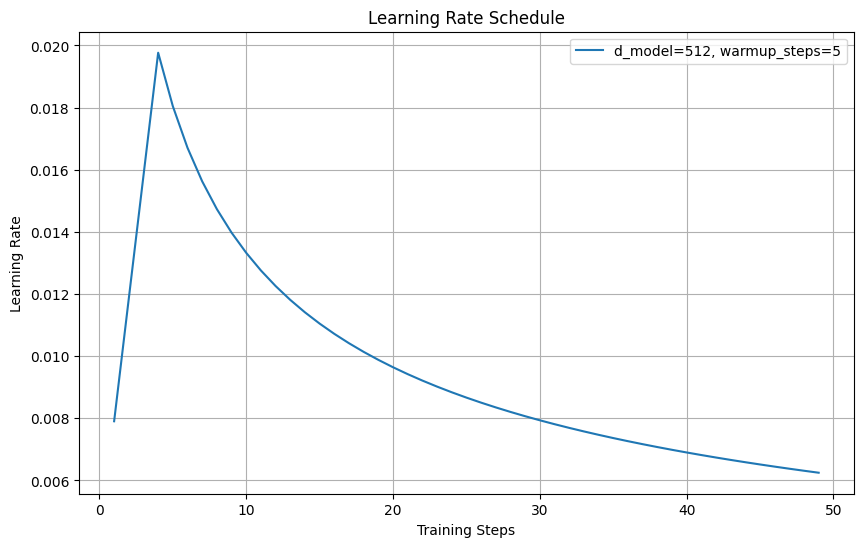

In [5]:
warmup_steps = 5
d_model = 512
epochs = 50 

# Learning rate function as defined in the scheduler
def lrate(step, warmup_steps, d_model):
    arg1 = (step + 1) ** -0.5
    arg2 = (step + 1) * warmup_steps ** -1.5
    return (d_model ** -0.5) * min(arg1, arg2)

# Generate data for plotting
steps = np.arange(1, 50)  # 1 to 20000 steps
learning_rates = [lrate(step, warmup_steps, d_model) for step in steps]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label=f'd_model={d_model}, warmup_steps={warmup_steps}')
plt.title('Learning Rate Schedule')
plt.xlabel('Training Steps')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.legend()
plt.show()
